In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import os
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img
from sklearn.model_selection import train_test_split


In [ ]:
# Mount Google Drive to access the uploaded folder
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define the main directory path where images are stored
import os

main_folder_path = "/content/drive/My Drive/UTKface_inthewild"

# Check if the main directory exists
if not os.path.exists(main_folder_path):
    print("Error: The folder UTKface_inthewild does not exist in My Drive. Please check the path.")
else:
    print("UTKface_inthewild folder found!")

UTKface_inthewild folder found!


In [ ]:
# List all subfolders (part1, part2, part3)
subfolders = [os.path.join(main_folder_path, folder) for folder in os.listdir(main_folder_path) if os.path.isdir(os.path.join(main_folder_path, folder))]

print(f"Found {len(subfolders)} subfolders: {subfolders}")


Found 3 subfolders: ['/content/drive/My Drive/UTKface_inthewild/part2', '/content/drive/My Drive/UTKface_inthewild/part1', '/content/drive/My Drive/UTKface_inthewild/part3']


In [ ]:

import glob

# Retrieves all image paths
image_files = glob.glob(os.path.join(main_folder_path, "**", "*.jpg"), recursive=True)

print(f"Total images found: {len(image_files)}")



Total images found: 24129


In [ ]:
import re

# Define the valid UTKFace filename pattern
def is_utkface_image(filename):
    # UTKFace pattern: age_gender_race_date.jpg
    return bool(re.match(r"^\d+_\d+_\d+_\d+\.(jpg|jpeg|png)$", filename))

# Apply the function
# Filter images based on the UTKFace naming pattern
utkface_images = [img for img in image_files if is_utkface_image(os.path.basename(img))]
print(f"Valid UTKFace images found: {len(utkface_images)}")


Valid UTKFace images found: 24101


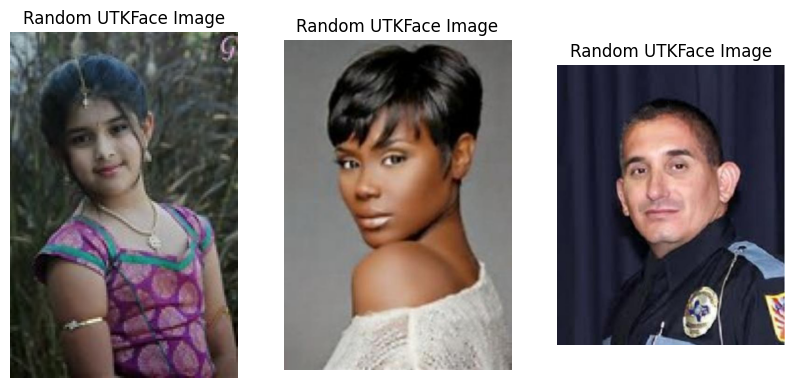

In [ ]:
# import random

# # Display the random valid UTKFace image
# if len(utkface_images) > 1:
#     random_image_path = random.choice(utkface_images)
#     print(f"Displaying a random UTKFace image: {random_image_path}")

#     image = Image.open(random_image_path)
#     plt.imshow(image)
#     plt.axis("off") # Hide axis labels
#     plt.show()


import random
import matplotlib.pyplot as plt
from PIL import Image

# Number of random images to display
num_images = 3  # Change this value to display more or fewer images

# Check if there are enough images available
if len(utkface_images) > 0:
    random_images = random.sample(utkface_images, min(num_images, len(utkface_images)))

    # Display the selected images
    fig, axes = plt.subplots(1, len(random_images), figsize=(10, 5))

    if len(random_images) == 1:
        axes = [axes]  # Ensure axes is iterable when only one image is selected

    for ax, image_path in zip(axes, random_images):
        image = Image.open(image_path)
        ax.imshow(image)
        ax.axis("off")  # Hide axis labels
        ax.set_title("Random UTKFace Image")

    plt.show()
else:
    print("No UTKFace images found.")


## PRE-PROCESSING





In [ ]:
# Set image dimensions (adjust based on the model you plan to use)
IMG_SIZE = (128, 128)  # Resize all images to 128x128
BATCH_SIZE = 32        # Number of images to process in one batch

# Function to preprocess images (resize, normalize)
def preprocess_image(image_path):
    """
    Loads an image, resizes it to IMG_SIZE, normalizes pixel values, and converts it to an array.
    """
    try:
        image = load_img(image_path, target_size=IMG_SIZE)  # Load and resize image
        image = img_to_array(image) / 255.0  # Convert to array and normalize pixels (0 to 1)
        return image
    except Exception as e:
        print(f"Error loading image {image_path}: {e}")
        return None  # Return None if an error occurs

# Process all images
preprocessed_images = [preprocess_image(img) for img in image_files]



In [ ]:
# Remove any None values (corrupted images)
preprocessed_images = [img for img in preprocessed_images if img is not None]



NameError: name 'preprocessed_images' is not defined

In [ ]:
# Convert to NumPy array for easier processing
X = np.array(preprocessed_images)
print(f"Total preprocessed images: {X.shape[0]}")



Total preprocessed images: 24129


In [ ]:
# Split dataset into training (80%) and validation (20%)
X_train, X_val = train_test_split(X, test_size=0.2, random_state=42)

print(f"Training samples: {len(X_train)}, Validation samples: {len(X_val)}")



In [ ]:
# Create ImageDataGenerators for data augmentation (only for training)
train_datagen = ImageDataGenerator(
    rotation_range=15,    # Randomly rotate images by 15 degrees
    width_shift_range=0.1,  # Shift width by 10%
    height_shift_range=0.1,  # Shift height by 10%
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode="nearest"   # Fill missing pixels with nearest values
)



In [ ]:
# Apply augmentation to the training set
train_generator = train_datagen.flow(X_train, batch_size=BATCH_SIZE, shuffle=True)



In [ ]:
# No augmentation for validation data (just normalization)
val_datagen = ImageDataGenerator()
val_generator = val_datagen.flow(X_val, batch_size=BATCH_SIZE, shuffle=False)

print("Preprocessing completed! Images are now ready for model training.")